### Install Requried Libararies 

In [129]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\mypc\anaconda3\lib\site-packages (2.13.0)



In [136]:
 pip install scikit-learn --upgrade

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\mypc\\anaconda3\\Lib\\site-packages\\~klearn\\metrics\\cluster\\_expected_mutual_info_fast.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




     ---------------------------------------- 9.2/9.2 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [130]:
pip install opencv-python==4.6.0.66

In [131]:
pip install visualkeras

#### IMPORT ALL REQURIED LIBRARIES

In [126]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.datasets import cifar10
from tensorflow.keras import datasets,layers,models
import itertools

import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import ELU, PReLU, LeakyReLU




In [132]:
from tensorflow.keras.datasets import cifar10

import numpy as np
import pandas as pd

import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from PIL import Image

#### LOADING DATA
X_train is the dataset of 32x32 color images of objects that the model will be trained on.

y_train is the dataset of labels that correspond to x_train.

X_test is the dataset of 32x32 color images of objects that the model will be tested on.

y_test is the dataset of labels that correspond to x_test.

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### Expolatory Data Analysis(EDA)

### Shape of Dataset 

In [5]:
print("Shape of traning data are:")
print(X_train.shape)
print(y_train.shape)

Shape of traning data are:
(50000, 32, 32, 3)
(50000, 1)


In [6]:
print("Shape of testing data are:")
print(X_test.shape)
print(y_test.shape)

Shape of testing data are:
(10000, 32, 32, 3)
(10000, 1)


##### CHECK IS THERE ANY NULL VALUES OR NOT

In [7]:
np.isnan(X_train).any()
        

False

In [8]:
np.isnan(X_test).any()

False

In [9]:
np.isnan(y_train).any()


False

In [10]:
np.isnan(y_test).any()

False

In [11]:
#Coverting 2D array into 1D array
y_train = y_train.flatten()
y_test = y_test.flatten()

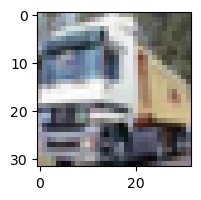

In [12]:
##Image at index 1 position in X_train dataset
plt.figure(figsize = (16,2))
plt.imshow(X_train[1])

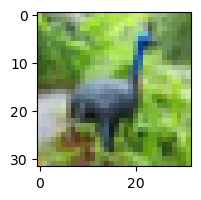

In [13]:
##Image at index 6 position in X_train dataset
plt.figure(figsize = (16,2))
plt.imshow(X_train[6])

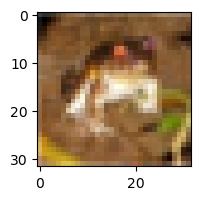

In [14]:
##Image at index 0 position in X_train dataset
plt.figure(figsize = (16,2))
plt.imshow(X_train[0])

# 
Below bar plot showing the count of y_train samples for each classes

[[Text(0, 0, 'airplane'),
  Text(1, 0, 'automobile'),
  Text(2, 0, 'bird'),
  Text(3, 0, 'cat'),
  Text(4, 0, 'deer'),
  Text(5, 0, 'dog'),
  Text(6, 0, 'frog'),
  Text(7, 0, 'horse'),
  Text(8, 0, 'ship'),
  Text(9, 0, 'truck')]]

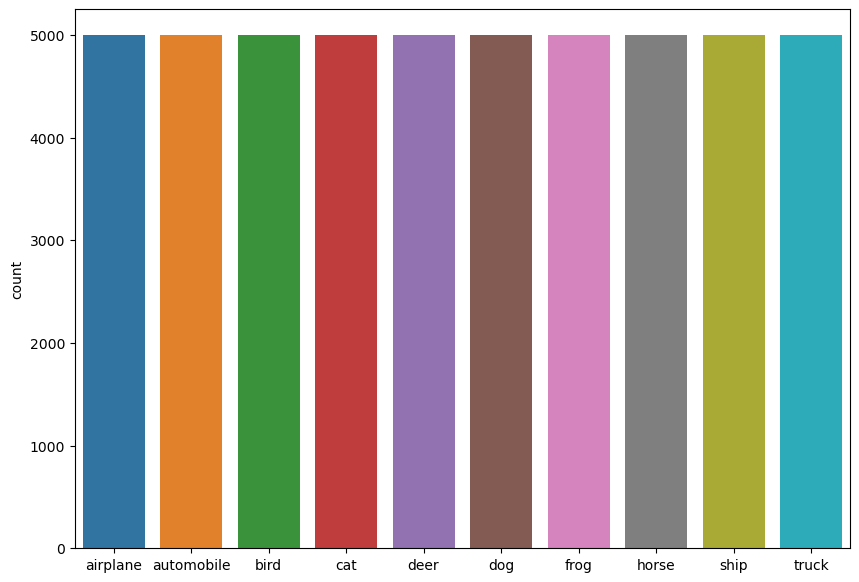

In [15]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes
plt.figure(figsize=(10,7))
p = sns.countplot(x= y_train.flatten())
p.set(xticklabels=classes)



#### Description 
We have 50000 training and 10000 test images in the dataset. The images have a structure of (32,32,3) which correspond to (width, height, RGB(red,green,blue)).

For each image there is a corresponding label, which is a class index.

In [16]:
x= print('Example training images and their labels: ' + str([x for x in y_train[0:5]])) 


Example training images and their labels: [6, 9, 9, 4, 1]


In [17]:
print('Corresponding classes for the labels: ' + str([classes[x] for x in y_train[0:5]]))



Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


In [18]:
y_train.shape

(50000,)

In [19]:
y_train   ##This is 1D array

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [20]:
y_train = y_train.reshape(-1,)  ###now this is 1D array
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

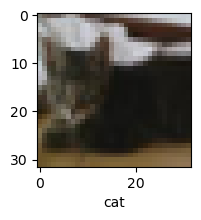

In [21]:
def image_sample(x,y,index):
    plt.figure(figsize = (16,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
image_sample(X_train,y_train,9)

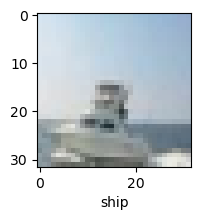

In [22]:
image_sample(X_train,y_train,100)

#### In above statements  1st we took 1 to 5 images from train datasets (which have specific number from 1-9) and then  we take cifar classes according to number apper in train image 

Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


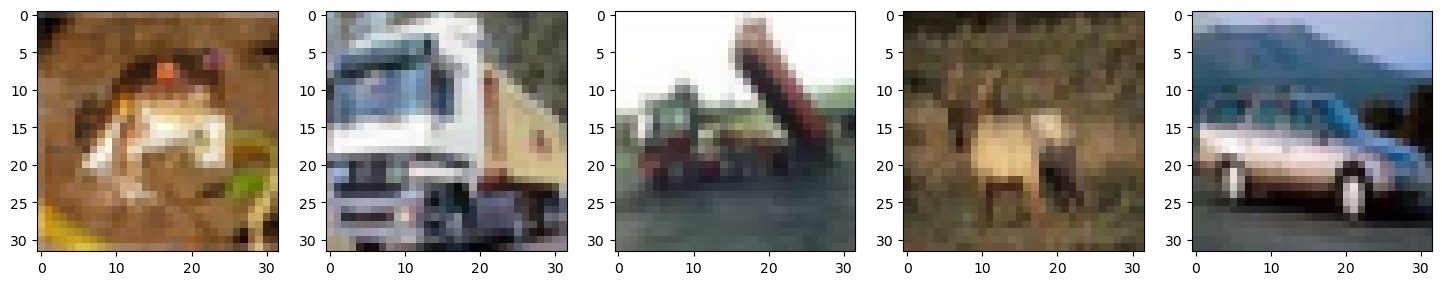

In [23]:
xy= print('Example training images and their labels: ' + str([x for x in y_train[0:10]])) 
f, axarr = plt.subplots(1,5)   ###plot 5 images in 1 line 
f.set_size_inches(18, 6)     ###image size should be 16*6

for i in range(5) :     ####using for loop we plot all 5 images(frog', 'truck', 'truck', 'deer', 'automobile') 
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()


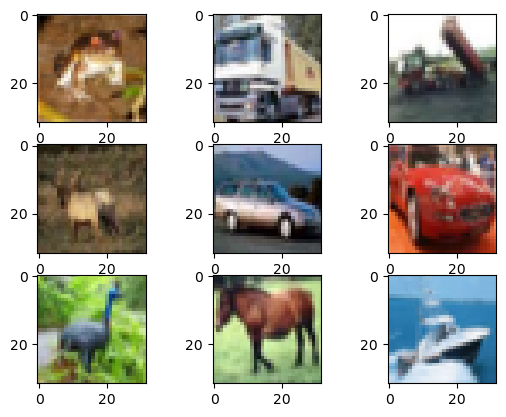

In [24]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i])
# show the figure
plt.show()

#### Normalize the test data by dividing it by 255

In [25]:
X_train = X_train/255
X_test = X_test /255

### ANN MODEL

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation = 'relu'),
        layers.Dense(1000, activation = 'relu'),
        layers.Dense(10, activation = 'sigmoid'),
    ])

ann.compile(optimizer ='SGD',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
ann.fit(X_train,y_train,epochs =10)

In [26]:
#ann.evaluate(X_test,y_test)

In [27]:
#from sklearn.metrics import confusion_matrix,classification_report
#y_prediction = ann.predict(X_test)
#y_prediction_classes =[np.argmax(element) for element in y_prediction ]
#print("Classification Report is:\n", classification_report(y_test, y_prediction_classes))

In [28]:
###CONFUSION MATRIX OF ANN MODEL
#cm = metrics.confusion_matrix(y_test,  y_prediction_classes)
#cm 
#cm_dis = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
#cm_dis.plot()
#plt.show()
#cm_dis

In [29]:
#Accuracy = metrics.accuracy_score(y_test, y_prediction_classes)
#Accuracy

### CNN MODEL_1
BASIC CNN MODEL FOR IMAGE CLASSIFICATION


In [30]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation ='relu' , input_shape =(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    #Denses layers
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation ='softmax')
])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [31]:
cnn.compile(optimizer = 'adam',loss ='sparse_categorical_crossentropy',metrics =['accuracy'])

In [32]:
cnn.fit(X_train, y_train, epochs =10)

Epoch 1/10
1563/1563 [==============================] - 75s 40ms/step - loss: 1.4398 - accuracy: 0.4827
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1048 - accuracy: 0.6121
Epoch 3/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9784 - accuracy: 0.6583
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8997 - accuracy: 0.6875
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8362 - accuracy: 0.7100
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7789 - accuracy: 0.7293
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7363 - accuracy: 0.7439
Epoch 8/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6953 - accuracy: 0.7589
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6545 - accuracy: 0.7701
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [33]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 13s 10ms/step - loss: 0.9409 - accuracy: 0.6931


[0.9409450888633728, 0.6930999755859375]

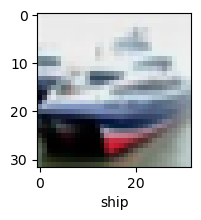

In [34]:
image_sample(X_test,y_test,1)

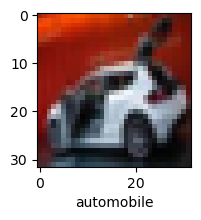

In [35]:
image_sample(X_test,y_test,6)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
Y_pred = cnn.predict(X_test)
Y_pred_classes =[np.argmax(element) for element in Y_pred]
print("Classification Report:\n", classification_report(y_test, Y_pred_classes))

313/313 [==============================] - 6s 13ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.67      0.72      1000
           1       0.78      0.83      0.81      1000
           2       0.60      0.58      0.59      1000
           3       0.51      0.52      0.51      1000
           4       0.60      0.68      0.64      1000
           5       0.60      0.60      0.60      1000
           6       0.75      0.79      0.77      1000
           7       0.77      0.72      0.74      1000
           8       0.78      0.80      0.79      1000
           9       0.79      0.74      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [37]:
Y_pred_classes =[np.argmax(element) for element in Y_pred]
Y_pred_classes[:5]


[3, 8, 1, 0, 6]

In [38]:
classes[:5]

['airplane', 'automobile', 'bird', 'cat', 'deer']

In [39]:
classes[Y_pred_classes[60]]

'horse'

In [40]:
y_test[60]

7

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
Y_pred = cnn.predict(X_test)
Y_pred_classes =[np.argmax(element) for element in Y_pred]
confusion_matrix = metrics.confusion_matrix(y_test, Y_pred_classes)
confusion_matrix 

313/313 [==============================] - 6s 13ms/step


array([[666,  32,  74,  25,  32,  11,  12,  14,  92,  42],
       [ 17, 832,  10,  13,   8,   7,   8,   4,  24,  77],
       [ 44,   8, 581,  55, 121,  67,  63,  32,  17,  12],
       [ 15,   6,  65, 516,  89, 169,  66,  45,  19,  10],
       [  8,   6,  65,  69, 679,  36,  70,  52,  15,   0],
       [ 11,   7,  53, 178,  57, 602,  27,  45,  15,   5],
       [  4,   3,  47,  73,  44,  28, 785,   6,   6,   4],
       [ 10,   4,  54,  37,  71,  67,   7, 724,   4,  22],
       [ 56,  39,  19,  23,  16,  10,   4,   5, 801,  27],
       [ 21, 124,   8,  23,   8,  12,   7,  18,  34, 745]], dtype=int64)

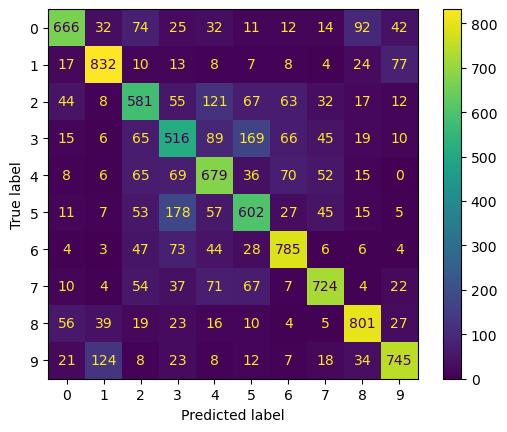

In [42]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()
cm_display

In [43]:
Accuracy = metrics.accuracy_score(y_test, Y_pred_classes)
print({"Accuracy":Accuracy})

{'Accuracy': 0.6931}


##### we ran basic cnn model with relu and softmax activation, got accuracy only 69.31%

In [44]:

cnn_1 = keras.Sequential()

cnn_1.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", input_shape=(227, 227, 3)))
cnn_1.add(layers.BatchNormalization())
cnn_1.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))


cnn_1.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu",padding="same"))
cnn_1.add(layers.BatchNormalization())
cnn_1.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))



cnn_1.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", padding="same"))
cnn_1.add(layers.BatchNormalization())


cnn_1.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu",padding="same"))
cnn_1.add(layers.BatchNormalization())


cnn_1.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu",padding="same"))
cnn_1.add(layers.BatchNormalization())
cnn_1.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))


cnn_1.add(layers.Flatten())
cnn_1.add(layers.Dense(4096, activation="relu"))
cnn_1.add(layers.Dropout(0.5))
cnn_1.add(layers.Dense(10, activation="softmax"))



cnn_1.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(learning_rate=0.001), 
              metrics=['accuracy'])
cnn_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 55, 55, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 27, 27, 256)       1024      
 chNormalization)                                                
                                                      

In [45]:
cnn_1 = keras.Sequential()

cnn_1.add(layers.Conv2D(filters=32, kernel_size=(3, 3), 
                        strides=(4, 4), activation="relu", input_shape=(227, 227, 3)))
#cnn_1.add(layers.BatchNormalization())
cnn_1.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))


cnn_1.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu",padding="same"))
#cnn_1.add(layers.BatchNormalization())
cnn_1.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))



cnn_1.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", padding="same"))
#cnn_1.add(layers.BatchNormalization())


cnn_1.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu",padding="same"))
#cnn_1.add(layers.BatchNormalization())


cnn_1.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu",padding="same"))
#cnn_1.add(layers.BatchNormalization())
cnn_1.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))


cnn_1.add(layers.Flatten())
cnn_1.add(layers.Dense(4096, activation="relu"))
cnn_1.add(layers.Dropout(0.5))
cnn_1.add(layers.Dense(10, activation="softmax"))



cnn_1.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(learning_rate=0.001), 
              metrics=['accuracy'])
cnn_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 57, 57, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 256)       205056    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 384)      

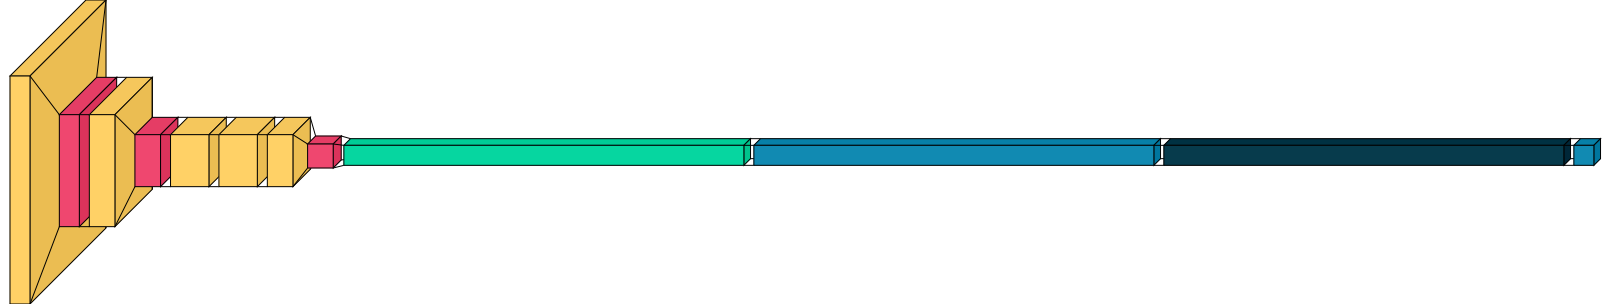

In [47]:
import visualkeras
visualkeras.layered_view(cnn_1)

In [49]:
#cnn_1.fit(X_train, y_train, epochs =10)

## CNN_MODEL_3 (GoogLeNet)

In [53]:
def cnn_model():
    
    model = Sequential()
    
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    model.summary()
    
    return model


In [54]:
model = cnn_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 256)        

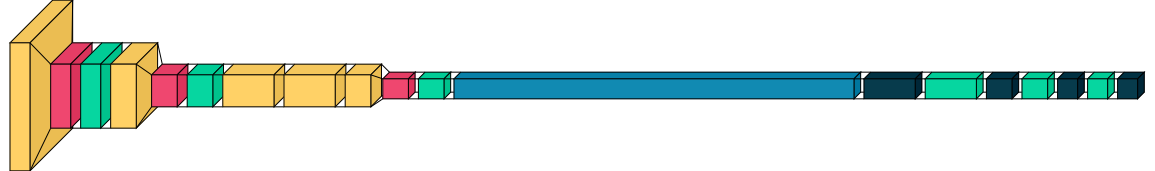

In [55]:
visualkeras.layered_view(model)

In [56]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0003, decay=1e-6),
             metrics=['accuracy'])

In [57]:
model.fit(X_train, y_train,epochs =10)

Epoch 1/10
1563/1563 [==============================] - 2040s 1s/step - loss: 2.1352 - accuracy: 0.1888
Epoch 2/10
1563/1563 [==============================] - 2096s 1s/step - loss: 1.6216 - accuracy: 0.3960
Epoch 3/10
1563/1563 [==============================] - 2097s 1s/step - loss: 1.3893 - accuracy: 0.5084
Epoch 4/10
1563/1563 [==============================] - 2222s 1s/step - loss: 1.2352 - accuracy: 0.5779
Epoch 5/10
1563/1563 [==============================] - 2300s 1s/step - loss: 1.1243 - accuracy: 0.6192
Epoch 6/10
1563/1563 [==============================] - 2099s 1s/step - loss: 1.0452 - accuracy: 0.6534
Epoch 7/10
1563/1563 [==============================] - 2056s 1s/step - loss: 0.9827 - accuracy: 0.6778
Epoch 8/10
1563/1563 [==============================] - 2060s 1s/step - loss: 0.9285 - accuracy: 0.7005
Epoch 9/10
1563/1563 [==============================] - 2104s 1s/step - loss: 0.8849 - accuracy: 0.7142
Epoch 10/10
1563/1563 [==============================] - 33432s 

In [58]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 118s 356ms/step - loss: 0.8008 - accuracy: 0.7432


[0.8007696270942688, 0.7432000041007996]

In [59]:
from sklearn.metrics import confusion_matrix,classification_report
Y_predict = model.predict(X_test)
Y_predict_classes =[np.argmax(element) for element in Y_predict]
print("Classification Report:\n", classification_report(y_test, Y_predict_classes))

313/313 [==============================] - 109s 345ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1000
           1       0.90      0.89      0.90      1000
           2       0.65      0.62      0.63      1000
           3       0.47      0.66      0.55      1000
           4       0.75      0.59      0.66      1000
           5       0.62      0.62      0.62      1000
           6       0.84      0.76      0.80      1000
           7       0.80      0.78      0.79      1000
           8       0.87      0.88      0.87      1000
           9       0.87      0.86      0.86      1000

    accuracy                           0.74     10000
   macro avg       0.76      0.74      0.75     10000
weighted avg       0.76      0.74      0.75     10000



In [60]:
confusion_matrix_model = metrics.confusion_matrix(y_test, Y_predict_classes)
confusion_matrix_model

array([[778,  14,  65,  21,   5,   1,   6,  10,  57,  43],
       [ 11, 892,   1,  20,   1,   4,   4,   2,  17,  48],
       [ 71,   2, 617,  96,  71,  65,  45,  20,   9,   4],
       [ 20,   3,  57, 664,  31, 158,  39,  14,  10,   4],
       [ 23,   1, 100,  94, 590,  41,  34, 102,  12,   3],
       [ 10,   1,  29, 275,  20, 619,   8,  34,   2,   2],
       [ 10,   3,  40, 128,  29,  13, 762,   3,   8,   4],
       [ 15,   1,  27,  49,  33,  87,   0, 776,   1,  11],
       [ 38,  13,  11,  38,   2,   2,   3,   4, 876,  13],
       [ 16,  60,   5,  25,   1,   3,   6,   6,  20, 858]], dtype=int64)

In [62]:
Accuracy = metrics.accuracy_score(y_test, Y_predict_classes)
print({"Accuracy":Accuracy})

{'Accuracy': 0.7432}


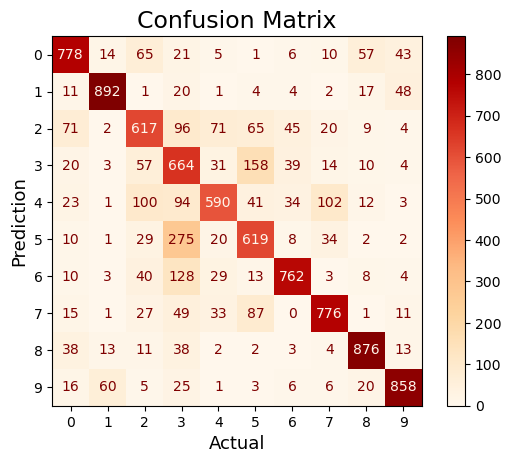

In [79]:
cm_display_model = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_model)
#cm_display_model.plot()
cm_display_model.plot(cmap="OrRd", values_format='')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
cm_display_model

#  
Using GoogleNet architecutre we add more filters and ran the model
Here we got accuracy 74.32%.
increase the accuracy after adding more filters.


## CNN MODEL_4  (DenseNet model)

In [84]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.models import Sequential


In [91]:
DenseNet_Model = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
DenseNet_Model.add(base_model)
DenseNet_Model.add(Dense(10, activation='softmax'))
DenseNet_Model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
DenseNet_Model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 dense_12 (Dense)            (None, 10)                10250     
                                                                 
Total params: 7047754 (26.89 MB)
Trainable params: 6964106 (26.57 MB)
Non-trainable params: 83648 (326.75 KB)
_________________________________________________________________


In [87]:
DenseNet_Model.fit(X_train, y_train,epochs =10)

Epoch 1/10
1563/1563 [==============================] - 1499s 882ms/step - loss: 1.1854 - accuracy: 0.6063
Epoch 2/10
1563/1563 [==============================] - 1321s 845ms/step - loss: 1.2206 - accuracy: 0.5877
Epoch 3/10
1563/1563 [==============================] - 1272s 814ms/step - loss: 0.9129 - accuracy: 0.6928
Epoch 4/10
1563/1563 [==============================] - 1333s 853ms/step - loss: 0.7691 - accuracy: 0.7416
Epoch 5/10
1563/1563 [==============================] - 1376s 881ms/step - loss: 0.7922 - accuracy: 0.7338
Epoch 6/10
1563/1563 [==============================] - 1357s 868ms/step - loss: 0.6527 - accuracy: 0.7787
Epoch 7/10
1563/1563 [==============================] - 1292s 827ms/step - loss: 0.7422 - accuracy: 0.7498
Epoch 8/10
1563/1563 [==============================] - 1279s 818ms/step - loss: 0.9289 - accuracy: 0.6907
Epoch 9/10
1563/1563 [==============================] - 1332s 852ms/step - loss: 0.6337 - accuracy: 0.7857
Epoch 10/10
1563/1563 [==============

In [88]:
DenseNet_Model.evaluate(X_test,y_test)

313/313 [==============================] - 87s 172ms/step - loss: 0.5989 - accuracy: 0.7908


[0.5988733172416687, 0.7907999753952026]

In [92]:
visualkeras.layered_view(DenseNet_Model)

In [147]:
DenseNet_Model_predict = DenseNet_Model.predict(X_test)
DenseNet_Model_classes =[np.argmax(element) for element in DenseNet_Model_predict]
print("Classification Report:\n", classification_report(y_test, DenseNet_Model_classes))

313/313 [==============================] - 112s 188ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.02      0.03      1000
           1       0.06      0.02      0.03      1000
           2       0.07      0.09      0.07      1000
           3       0.08      0.03      0.05      1000
           4       0.09      0.12      0.10      1000
           5       0.08      0.01      0.02      1000
           6       0.05      0.04      0.04      1000
           7       0.10      0.08      0.09      1000
           8       0.12      0.49      0.19      1000
           9       0.13      0.02      0.03      1000

    accuracy                           0.09     10000
   macro avg       0.08      0.09      0.07     10000
weighted avg       0.08      0.09      0.07     10000



In [90]:
DenseNet_Model_CM = metrics.confusion_matrix(y_test, DenseNet_Model_classes)
DenseNet_Model_CM



array([[869,  18,  17,  13,   8,   8,   4,  11,  40,  12],
       [ 12, 926,   1,   4,   2,   6,   4,   3,  15,  27],
       [ 55,   4, 651,  39,  47, 103,  64,  28,   5,   4],
       [ 19,   5,  37, 537,  28, 265,  49,  44,   8,   8],
       [ 15,   1,  56,  50, 737,  57,  41,  37,   6,   0],
       [  8,   4,  17,  69,  20, 829,  18,  31,   1,   3],
       [  5,   8,  20,  39,  14,  36, 862,  10,   5,   1],
       [ 11,   2,  11,  19,  20,  69,   5, 855,   3,   5],
       [ 53,  26,   5,  10,   1,   5,   7,   2, 885,   6],
       [ 35, 127,   3,   7,   6,   5,   3,  17,  40, 757]], dtype=int64)

In [119]:
Accuracy = metrics.accuracy_score(y_test,DenseNet_Model_classes)
print({"Accuracy":Accuracy})

{'Accuracy': 0.7908}


After using DensNet architecture accuracy of image prediction get incresed upto 80%